In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df_speeches = pd.read_csv('../data/wps_speeches.csv')


# speeches by secretary-general and deputy secretary-general
secretary_speeches = df_speeches[
    df_speeches['speaker'].str.contains(r'Secretary-General', case=False, regex=True, na=False)
]

secretary_speeches.to_csv('../data/secretary.csv', index=False)
#df_speeches[]

In [10]:
# Find duplicates
duplicates = df_speeches[df_speeches.duplicated(subset=['text'],keep=False)]  # keep=False considers all duplicates as True

# Display the duplicate rows
print("Duplicate rows:")
duplicates

# no more duplicates!!

Duplicate rows:


,filename,year,session number,text,speaker,country/organization,language,gender,only text


In [11]:
filtered_speeches = df_speeches[
    ~df_speeches['speaker'].str.contains(r'(the President|the Secretary-General|the deputy secretary-general)', case=False, regex=True, na=False)
]
the_speeches = filtered_speeches[filtered_speeches['speaker'].str.contains(r'\b(T|t)he\b', regex=True, na=False)]
the_speeches

C:\Users\hanna\AppData\Local\Temp\ipykernel_23940\3266321282.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ~df_speeches['speaker'].str.contains(r'(the President|the Secretary-General|the deputy secretary-general)', case=False, regex=True, na=False)
C:\Users\hanna\AppData\Local\Temp\ipykernel_23940\3266321282.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  the_speeches = filtered_speeches[filtered_speeches['speaker'].str.contains(r'\b(T|t)he\b', regex=True, na=False)]


,filename,year,session number,text,speaker,country/organization,language,gender,only text
504,UNSC_2009_SPV.6180_spch013.txt,2009,6180,"Mr. Bui The Giang (Viet Nam): I thank you, Mr....",Mr. Bui The Giang,Viet Nam,English,m,"I thank you, Mr. President, for convening thi..."
705,UNSC_2010_SPV.6411Resumption1_spch034.txt,2010,6411,"Mr. Bui The Giang (Viet Nam): I thank you, Mr....",Mr. Bui The Giang,Viet Nam,English,m,"I thank you, Mr. President, and the delegatio..."


In [12]:
permanent_members = ["China", "France", "Russian Federation", "United Kingdom", "United States of America"]

gender_colors = {'m': 'pink', 'f': 'blue'}

In [13]:
gender_distribution = df_speeches.groupby(['year', 'gender']).size().unstack(fill_value=0)
unique_speakers_list_per_year = df_speeches.groupby('year')['speaker'].unique()

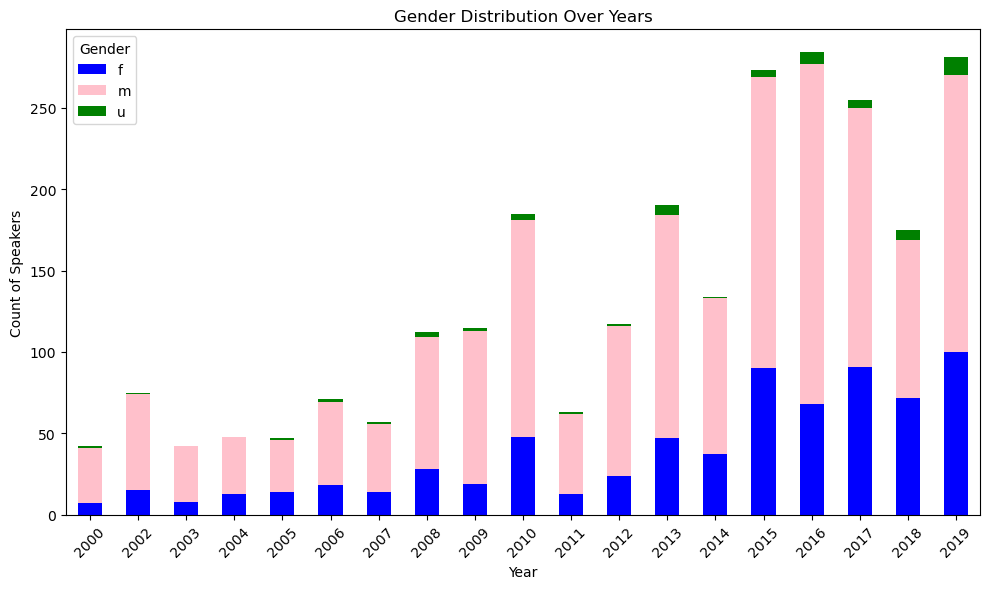

In [14]:
gender_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=[gender_colors.get(g, 'green') for g in gender_distribution.columns])

plt.title('Gender Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Count of Speakers')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Normalized Country Distribution (Percentages):
country/organization      China     France  Russian Federation  \
year                                                             
2000                  20.000000  20.000000           20.000000   
2002                  20.000000  20.000000           20.000000   
2003                  25.000000  25.000000           25.000000   
2004                  25.000000  25.000000           25.000000   
2005                  20.000000  20.000000           20.000000   
2006                  22.222222  22.222222           22.222222   
2007                  20.000000  20.000000           20.000000   
2008                  12.500000  25.000000           25.000000   
2009                  23.076923  23.076923           23.076923   
2010                  20.000000  20.000000           25.000000   
2011                  20.000000  20.000000           20.000000   
2012                  22.222222  22.222222           22.222222   
2013                  21.4285

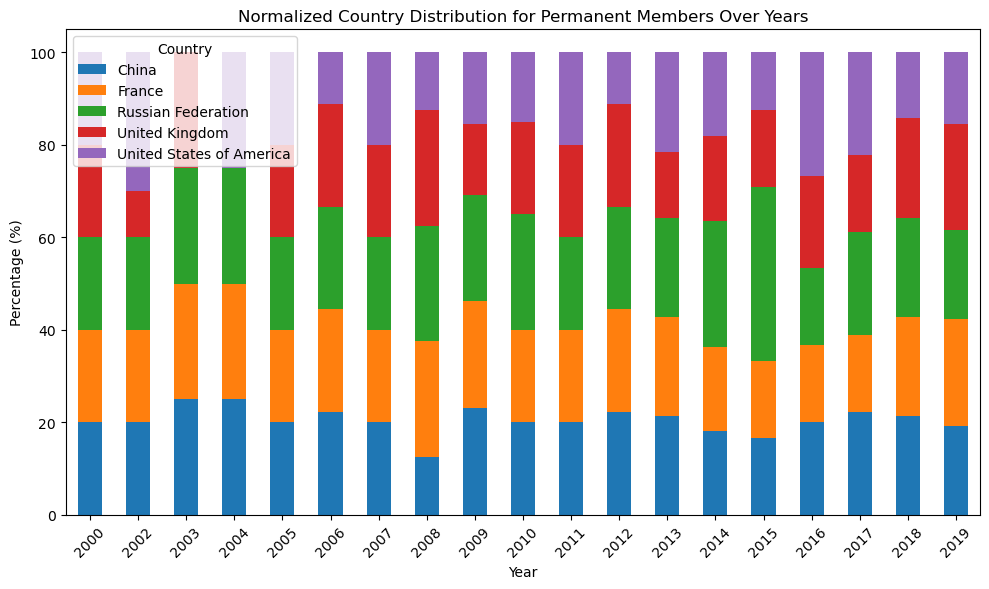

In [15]:
# Group by year and country/organization, then count occurrences
country_distribution = df_speeches.groupby(['year', 'country/organization']).size().unstack(fill_value=0)
# check only for permanent members
filtered_permanent_members = country_distribution[permanent_members]

# normalize per year
normalized_data = filtered_permanent_members.div(filtered_permanent_members.sum(axis=1), axis=0) * 100

print("Normalized Country Distribution (Percentages):")
print(normalized_data)

normalized_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Normalized Country Distribution for Permanent Members Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()

plt.show()

Normalized Gender Distribution (Percentages):
gender          f          m         u
year                                  
2000    16.666667  80.952381  2.380952
2002    20.000000  78.666667  1.333333
2003    19.047619  80.952381  0.000000
2004    27.083333  72.916667  0.000000
2005    29.787234  68.085106  2.127660
2006    25.352113  71.830986  2.816901
2007    24.561404  73.684211  1.754386
2008    25.000000  72.321429  2.678571
2009    16.521739  81.739130  1.739130
2010    25.945946  71.891892  2.162162
2011    20.634921  77.777778  1.587302
2012    20.512821  78.632479  0.854701
2013    24.736842  72.105263  3.157895
2014    27.611940  71.641791  0.746269
2015    32.967033  65.567766  1.465201
2016    23.943662  73.591549  2.464789
2017    35.686275  62.352941  1.960784
2018    41.142857  55.428571  3.428571
2019    35.587189  60.498221  3.914591


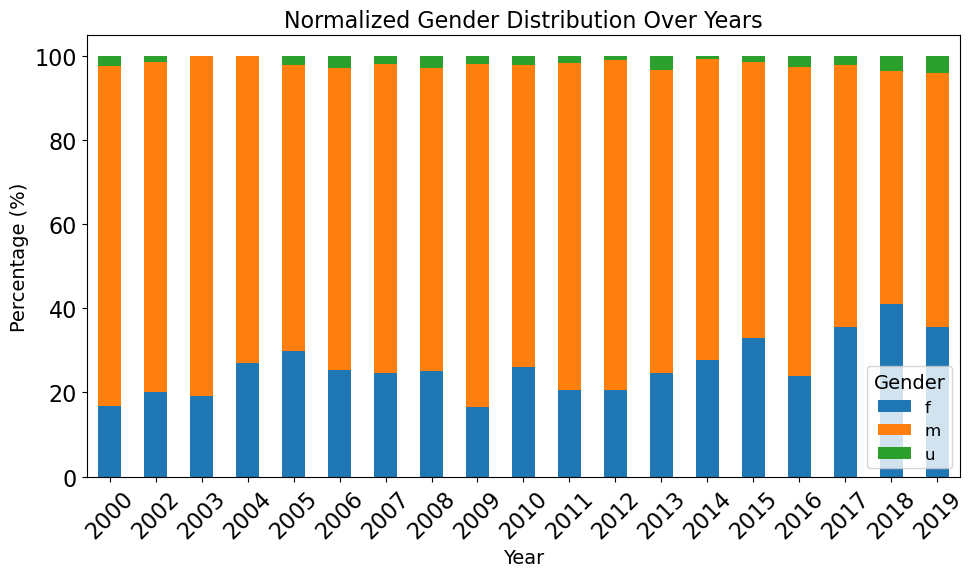

In [21]:
# Group by year and gender, then count occurrences
gender_distribution = df_speeches.groupby(['year', 'gender']).size().unstack(fill_value=0)

# normalize per year
normalized_data = gender_distribution.div(gender_distribution.sum(axis=1), axis=0) * 100

print("Normalized Gender Distribution (Percentages):")
print(normalized_data)

normalized_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Normalized Gender Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

plt.show()

Normalized Gender Distribution (Percentages) for Permanent Members:
gender          f           m
year                         
2000    20.000000   80.000000
2002     0.000000  100.000000
2003     0.000000  100.000000
2004    25.000000   75.000000
2005    20.000000   80.000000
2006    11.111111   88.888889
2007    20.000000   80.000000
2008    37.500000   62.500000
2009    15.384615   84.615385
2010    15.000000   85.000000
2011    20.000000   80.000000
2012    11.111111   88.888889
2013    28.571429   71.428571
2014    18.181818   81.818182
2015    12.500000   87.500000
2016    26.666667   73.333333
2017    33.333333   66.666667
2018    35.714286   64.285714
2019    26.923077   73.076923


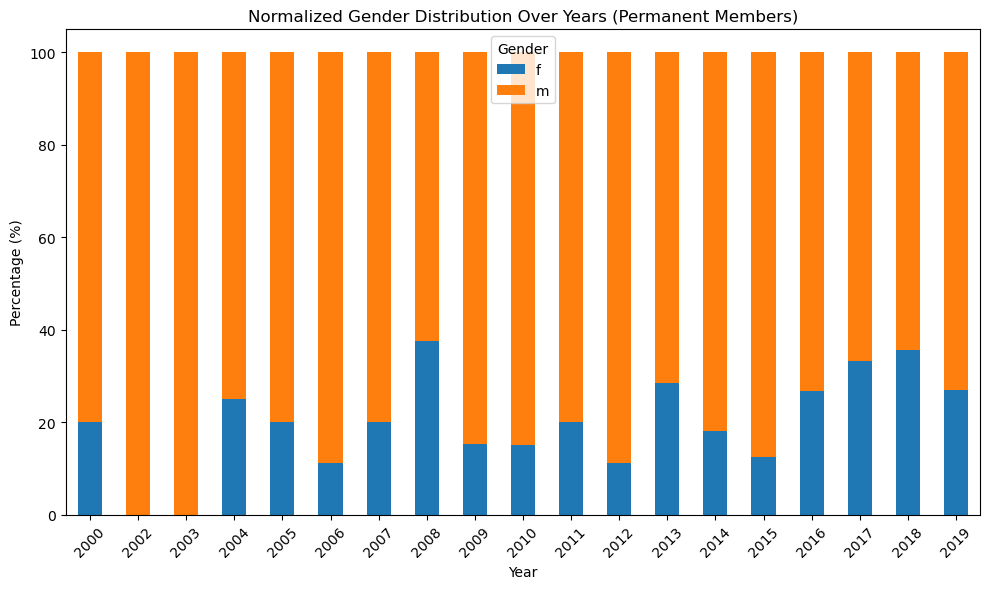

In [17]:
df_permanent_members = df_speeches[df_speeches['country/organization'].isin(permanent_members)]

gender_distribution = df_permanent_members.groupby(['year', 'gender']).size().unstack(fill_value=0)

normalized_data = gender_distribution.div(gender_distribution.sum(axis=1), axis=0) * 100

print("Normalized Gender Distribution (Percentages) for Permanent Members:")
print(normalized_data)

normalized_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Normalized Gender Distribution Over Years (Permanent Members)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

plt.show()

<Figure size 1000x600 with 0 Axes>

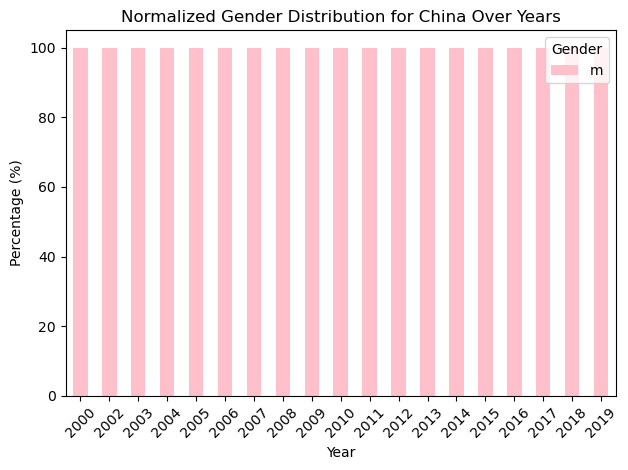

<Figure size 1000x600 with 0 Axes>

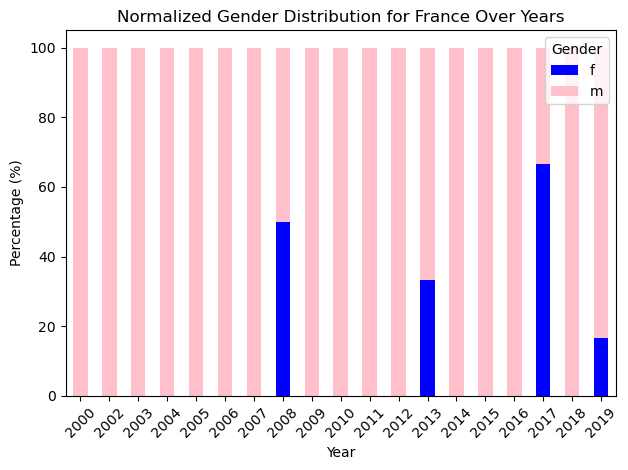

<Figure size 1000x600 with 0 Axes>

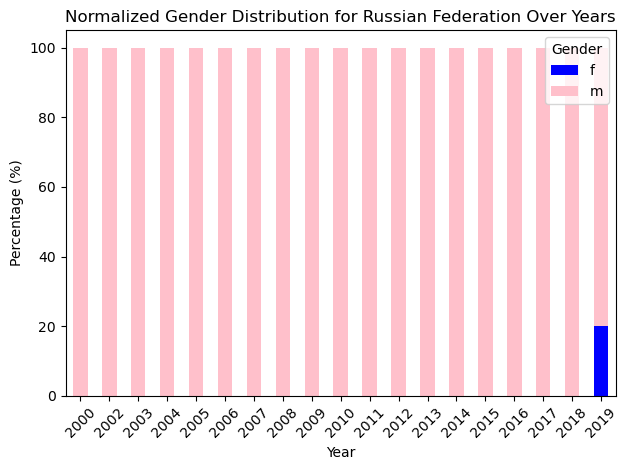

<Figure size 1000x600 with 0 Axes>

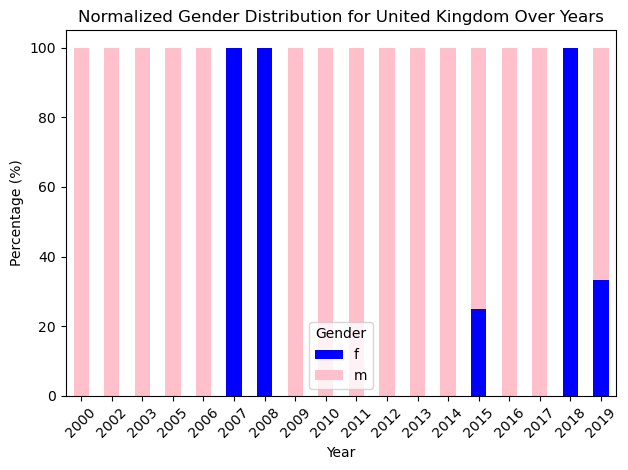

<Figure size 1000x600 with 0 Axes>

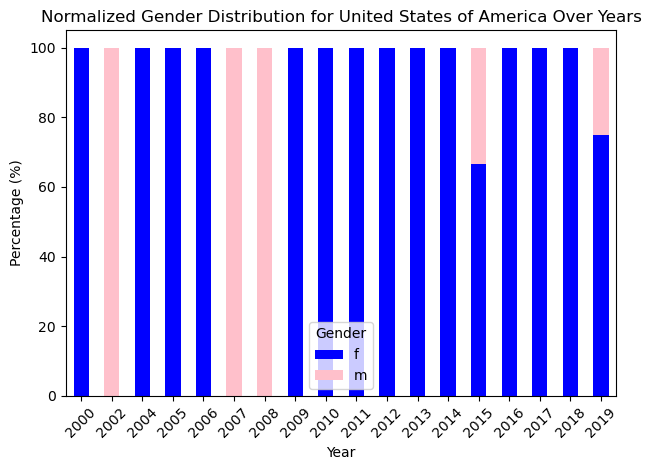

In [18]:
# Filter the speeches for permanent members and include gender and country
df_filtered = df_speeches[df_speeches['country/organization'].isin(permanent_members)]

# Create subplots for each permanent country
for country in permanent_members:
    country_data = df_filtered[df_filtered['country/organization'] == country]

    gender_distribution_country = country_data.groupby(['year', 'gender']).size().unstack(fill_value=0)

    normalized_gender_distribution_country = gender_distribution_country.div(gender_distribution_country.sum(axis=1), axis=0) * 100

    plt.figure(figsize=(10, 6))
    normalized_gender_distribution_country.plot(kind='bar', stacked=True, color=[gender_colors.get(g, 'gray') for g in normalized_gender_distribution_country.columns])

    plt.title(f'Normalized Gender Distribution for {country} Over Years')
    plt.xlabel('Year')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.legend(title='Gender')
    plt.tight_layout()

    plt.show()


Normalized Gender Distribution by Country (Percentages):
gender                            f           m
country/organization                           
China                      0.000000  100.000000
France                    10.638298   89.361702
Russian Federation         1.851852   98.148148
United Kingdom            20.454545   79.545455
United States of America  83.333333   16.666667


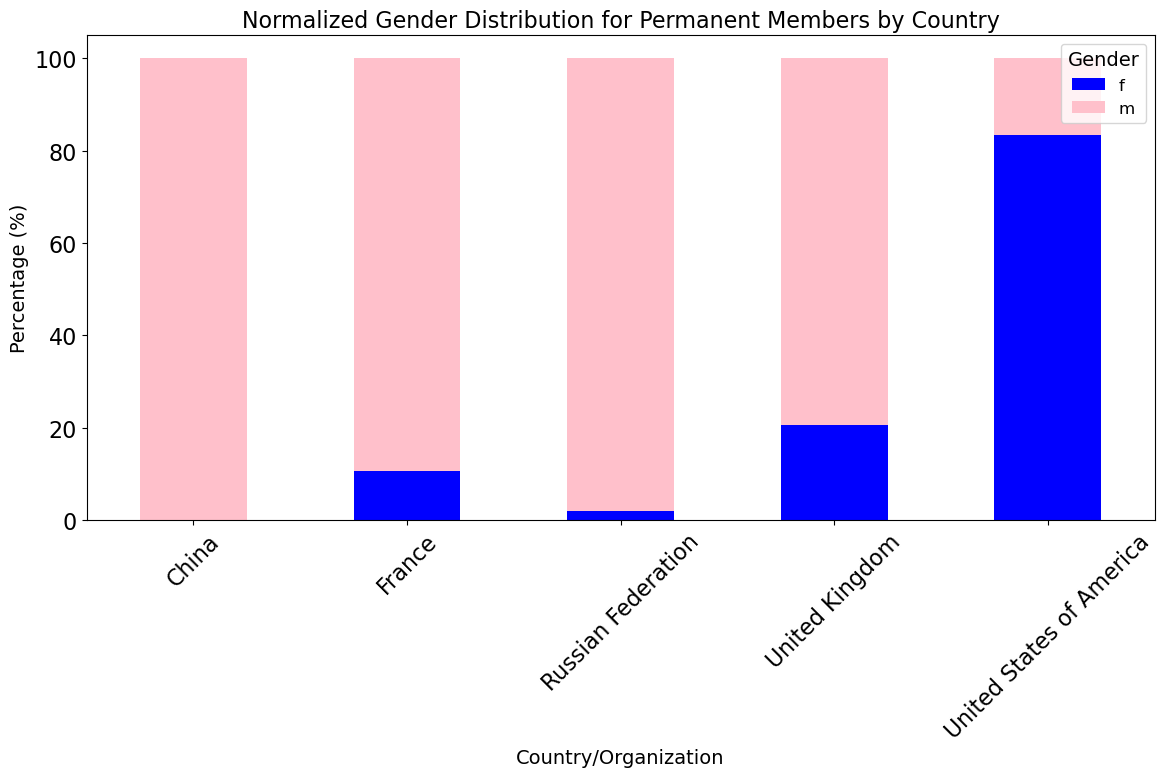

In [20]:
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 12,
    'figure.titlesize': 18
})
gender_country_distribution = df_filtered.groupby(['country/organization', 'gender']).size().unstack(fill_value=0)

# Normalize the data by country (to get percentages)
normalized_gender_country_data = gender_country_distribution.div(gender_country_distribution.sum(axis=1), axis=0) * 100

# Print normalized data (percentage distribution)
print("Normalized Gender Distribution by Country (Percentages):")
print(normalized_gender_country_data)

# Plotting the normalized gender distribution by country
normalized_gender_country_data.plot(kind='bar', stacked=True, figsize=(12, 8), color=[gender_colors.get(g, 'gray') for g in normalized_gender_distribution_country.columns])

plt.title('Normalized Gender Distribution for Permanent Members by Country')
plt.xlabel('Country/Organization')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

plt.show()
